In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [17]:
data=pd.read_csv('ToyotaCorolla.csv', encoding='latin1')

In [18]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [21]:
data_subset=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [22]:
data_subset.info

<bound method DataFrame.info of       Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]>

In [23]:
data_subset.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


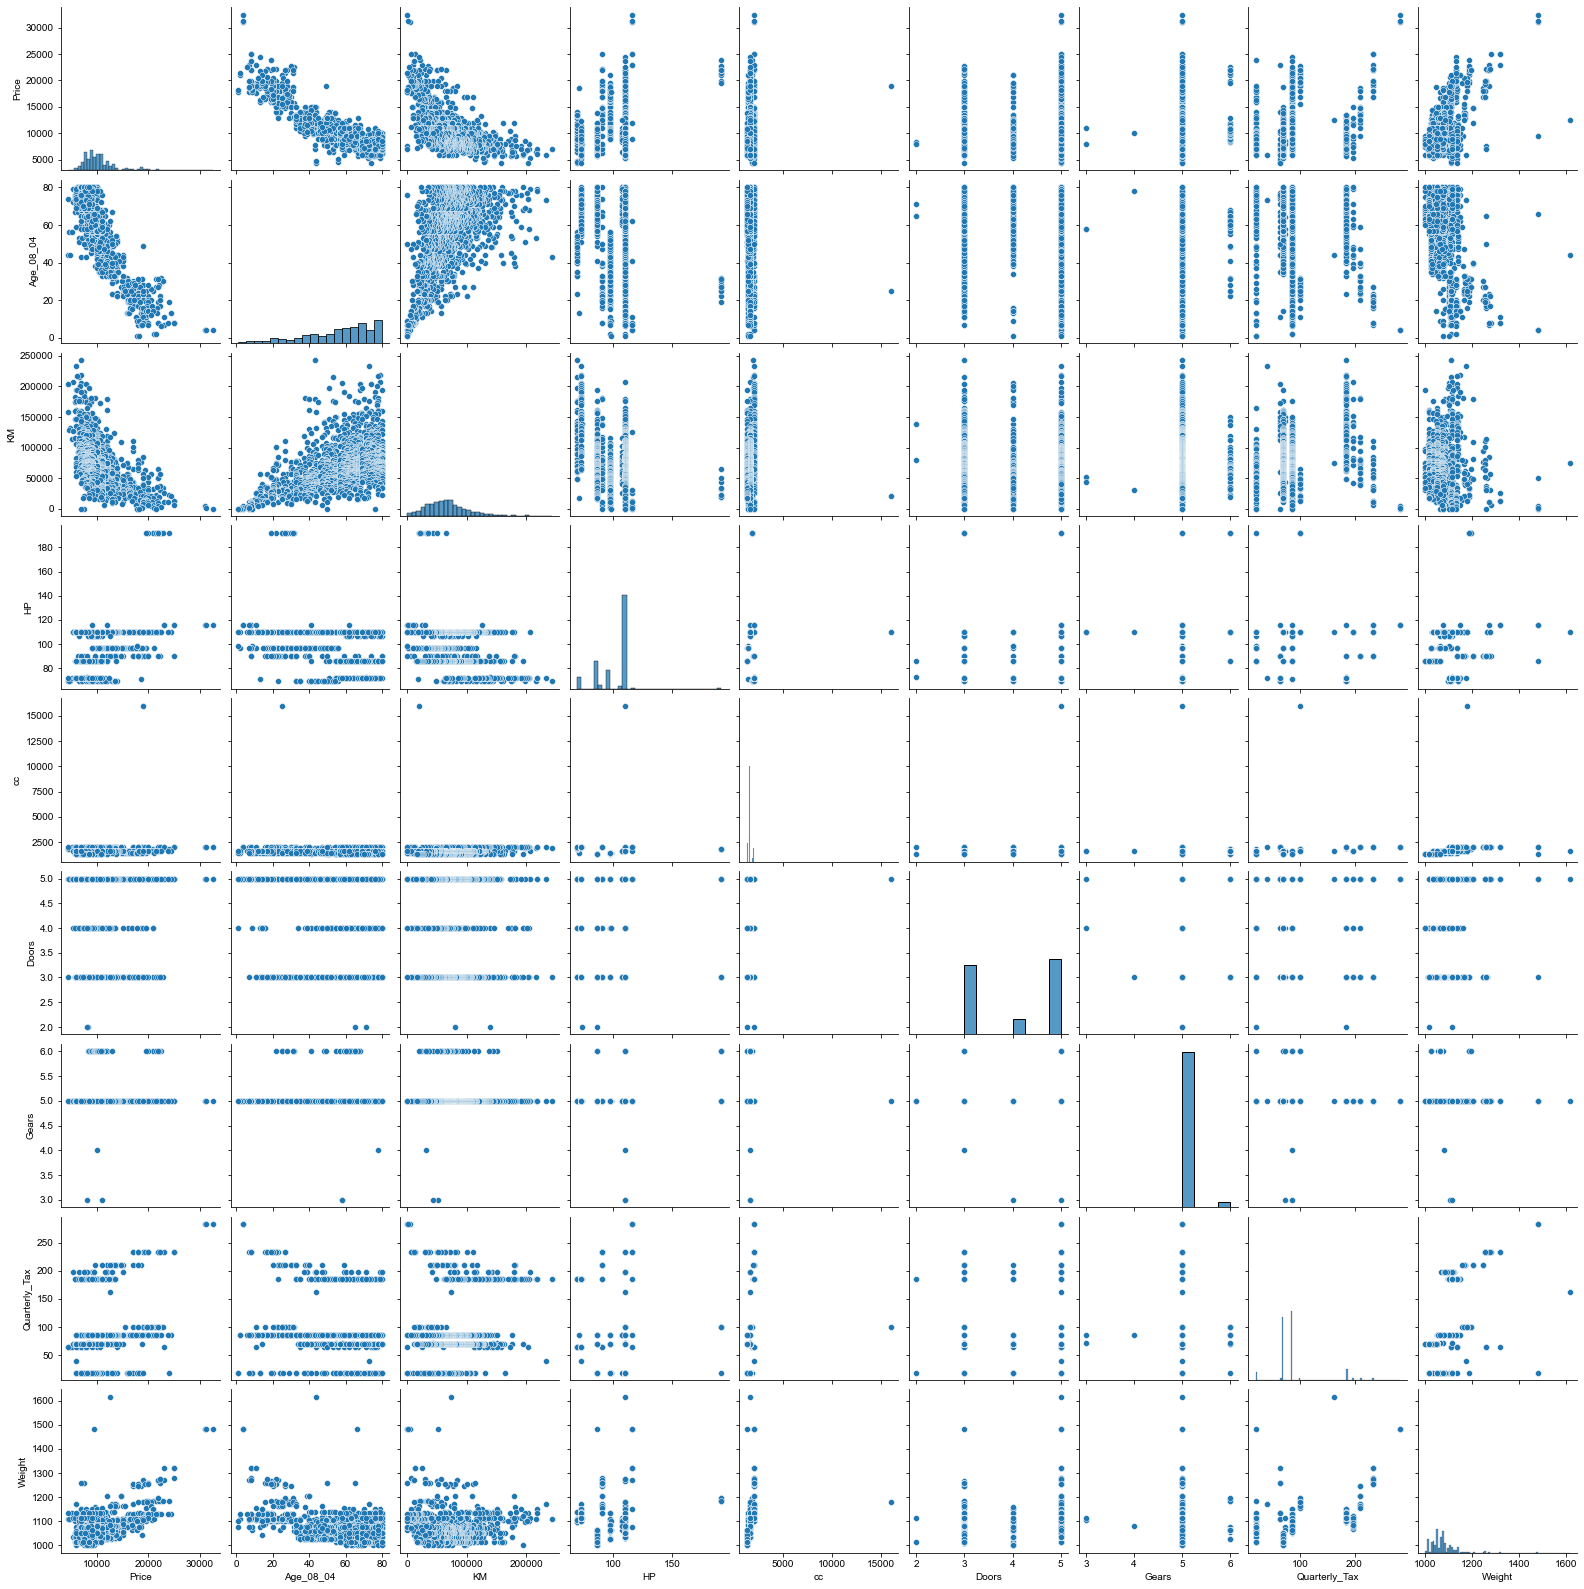

In [26]:
sns.pairplot(data_subset)
sns.set_style(style='darkgrid')

In [27]:
model=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=data_subset).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        15:33:27   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
print(model.tvalues ,"\n",model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


# Removing Doors from the model 


In [30]:
model_1=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=data_subset).fit()

In [32]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        15:37:25   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Removing CC from the model 

In [53]:
model_2=smf.ols("Price~Age_08_04+KM+HP+Quarterly_Tax+Weight", data=data_subset).fit()

In [54]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1797.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1430   BIC:                         2.481e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2554.4355   1048.246     -2.437      0.015   -4610.700    -498.171
Age_08_04      -121.8366      2.623    -46.454      0.000    -126.981    -116.692
KM               -0.0207      0.001    -16.543      0.000      -0.023      -0.018
HP               33.3411      2.731     12.209      0.000      27.984      38.698
Quarterly_Tax     3.9716      1.298      3.060      0.002       1.425       6.518
Weight           16.5860      1.022     16.224      0.000      14.581      18.591
==============================================================================
Omnibus:                      144.527   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.235
Skew:                          -0.209   Prob(JB):                    2.21e-198
Kurtosis:                       6.878   Cond. No.                     2.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
data2=data_subset[["Price","Age_08_04","KM","HP","Gears","Quarterly_Tax","Weight"]]

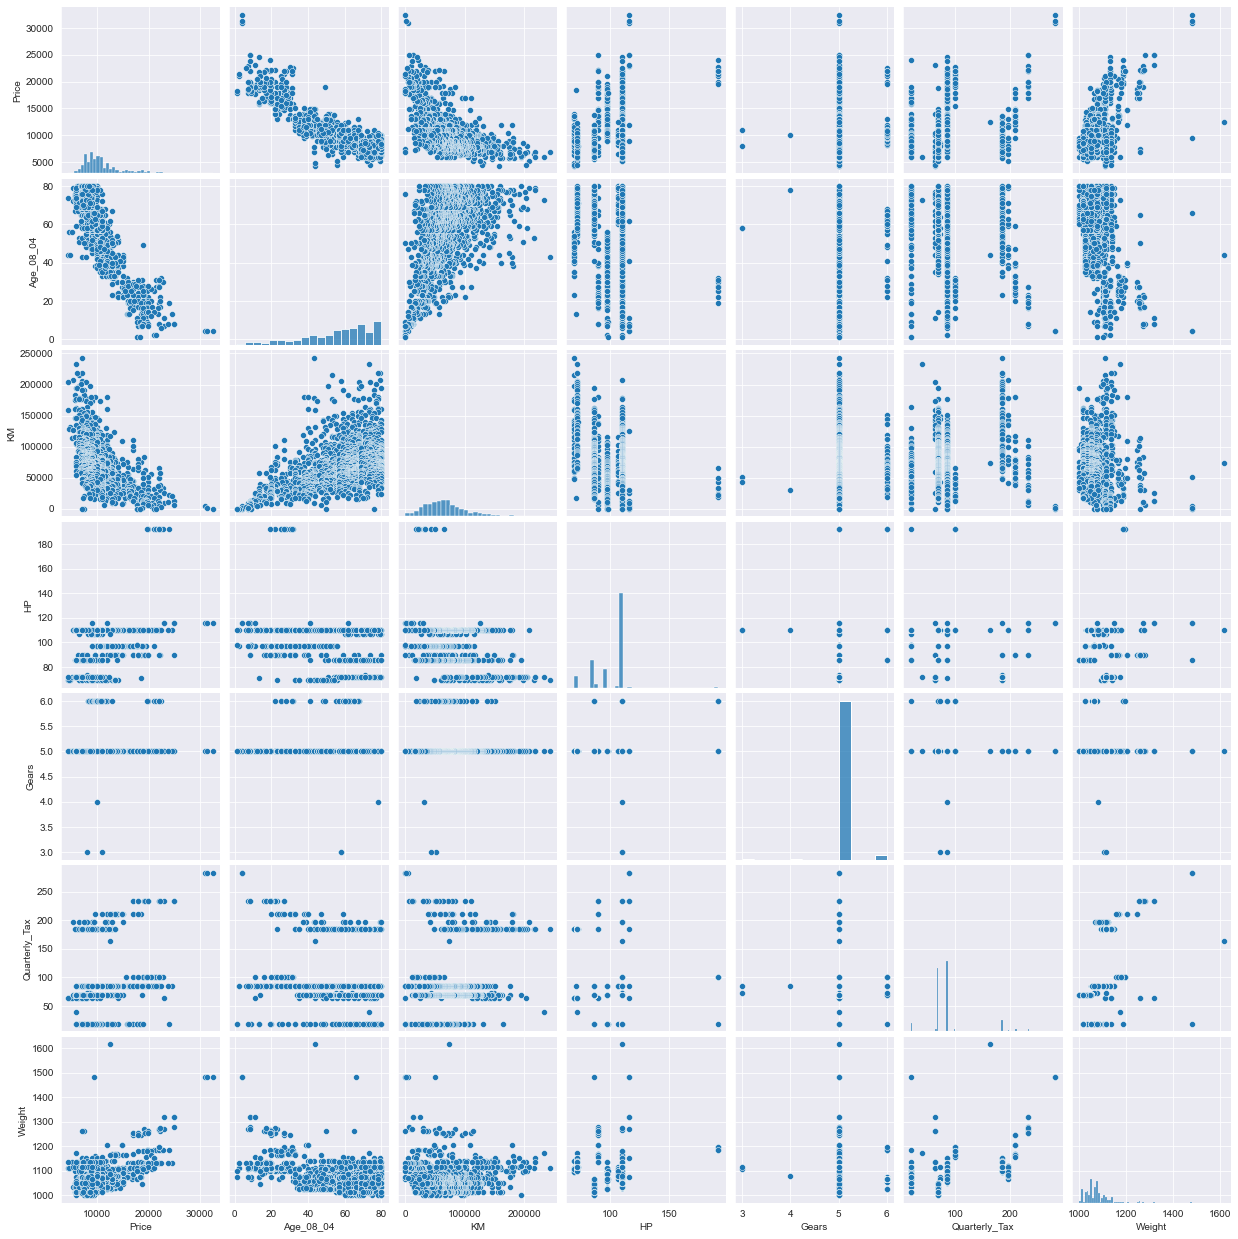

In [39]:
sns.pairplot(data2)
sns.set_style(style='darkgrid')

In [40]:
data2.corr()

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.209477,-0.298432,0.089614
Gears,0.063104,-0.005364,0.015023,0.209477,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.020613,0.626134,1.000000


In [55]:
data3=data2[["Price","Age_08_04","KM","Weight",'Quarterly_Tax']]

In [56]:
data3.corr()

,Price,Age_08_04,KM,Weight,Quarterly_Tax
Price,1.000000,-0.876590,-0.569960,0.581198,0.219197
Age_08_04,-0.876590,1.000000,0.505672,-0.470253,-0.198431
KM,-0.569960,0.505672,1.000000,-0.028598,0.278165
Weight,0.581198,-0.470253,-0.028598,1.000000,0.626134
Quarterly_Tax,0.219197,-0.198431,0.278165,0.626134,1.000000


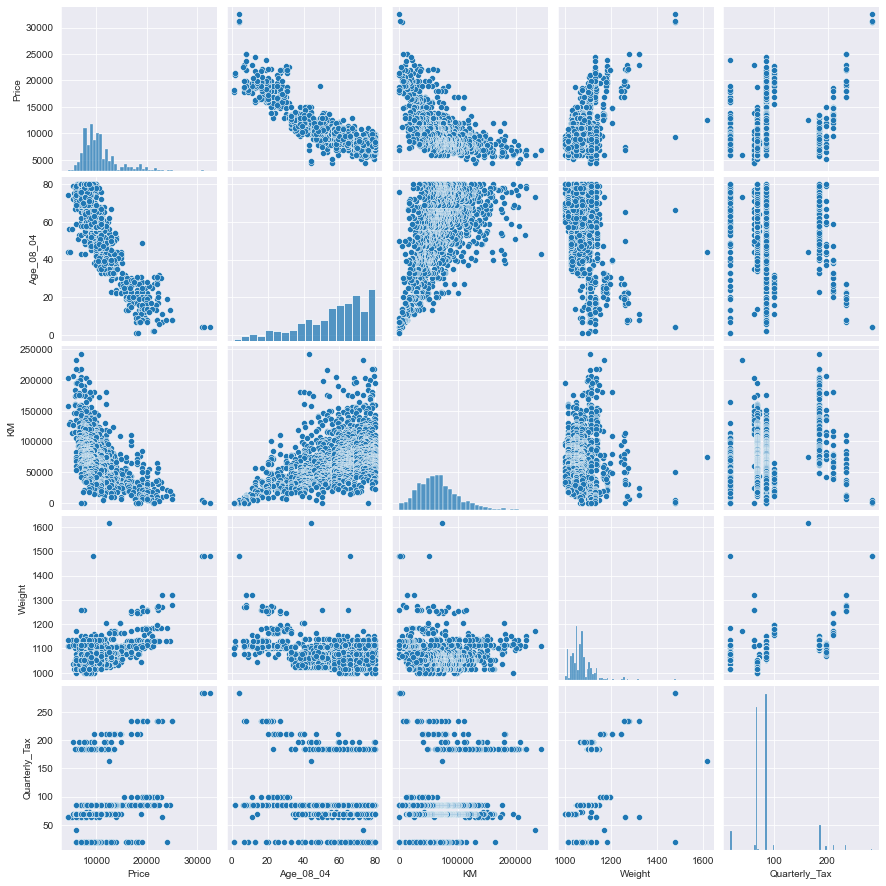

In [57]:
sns.pairplot(data=data3)

In [58]:
model_age=smf.ols('Price~Age_08_04', data= data3).fit()

In [59]:
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        16:08:01   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model_3=smf.ols('Price~Age_08_04+KM+Weight+Quarterly_Tax', data=data3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2001.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        16:08:34   Log-Likelihood:                -12452.
No. Observations:                1436   AIC:                         2.491e+04
Df Residuals:                    1431   BIC:                         2.494e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2711.3350   1101.060     -2.462      0.014   -4871.200    -551.470
Age_08_04      -120.6245      2.753    -43.814      0.000    -126.025    -115.224
KM               -0.0234      0.001    -18.171      0.000      -0.026      -0.021
Weight           20.4844      1.020     20.079      0.000      18.483      22.486
Quarterly_Tax    -1.9631      1.264     -1.553      0.121      -4.443       0.517
==============================================================================
Omnibus:                      252.346   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2688.639
Skew:                          -0.475   Prob(JB):                         0.00
Kurtosis:                       9.636   Cond. No.                     2.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
model_KM=smf.ols('Price~KM', data=data3).fit()

In [47]:
model_KM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.76e-124
Time:                        15:51:04   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
model_KM_Age=smf.ols('Price~Age_08_04+KM', data=data3).fit()
model_KM_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        15:52:30   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
Age_08_04   -154.1492      2.736    -56.334      0.000    -159.517    -148.782
KM            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF ( incase there is any co-linearity)

In [72]:
rsq_age=smf.ols('Age_08_04~KM+Weight+Quarterly_Tax', data=data3).fit().rsquared
VIF_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age_08_04+Weight+Quarterly_Tax',data=data3).fit().rsquared
VIF_KM=1/(1-rsq_KM)

rsq_Weight=smf.ols('Weight~Age_08_04+KM+Quarterly_Tax', data=data3).fit().rsquared
VIF_Weight=1/(1-rsq_Weight)

rsq_tax=smf.ols('Quarterly_Tax~Age_08_04+KM+Weight',data=data3).fit().rsquared
Vif_tax=1/(1-rsq_tax)

d1={'Variables':["Age_08_04","KM","Weight","Quarterly_tax"],"VIF":[VIF_age,VIF_KM,VIF_Weight,Vif_tax]}
VIF=pd.DataFrame(d1)
print(VIF)

       Variables       VIF
0      Age_08_04  1.881098
1             KM  1.680232
2         Weight  2.068997
3  Quarterly_tax  1.939506


## Residual Analysis 

/Users/mohamedsemaia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/mohamedsemaia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/mohamedsemaia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


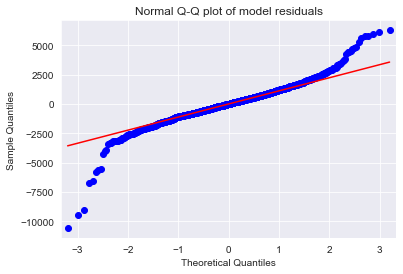

In [68]:
import statsmodels.api as sm 
QQ_Plot=sm.qqplot(model_3.resid, line='q')
plt.title('Normal Q-Q plot of model residuals')
plt.show()

In [70]:
list(np.where(model_3.resid>5000))


[array([ 14,  16,  49, 109, 141, 147, 523])]

In [71]:
list(np.where(model_3.resid<-5000))

[array([191, 192, 221, 393, 402, 601, 654, 960])]

### Residual plot for Homoscedasticity

In [73]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

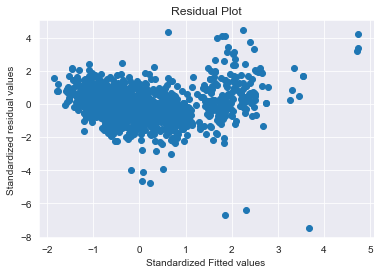

In [74]:
plt.scatter(get_standardized_values(model_3.fittedvalues),
            get_standardized_values(model_3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# detecting outliers using Cook's Distance 


In [78]:
model_influence = model_3.get_influence()
(c_V, _) = model_influence.cooks_distance

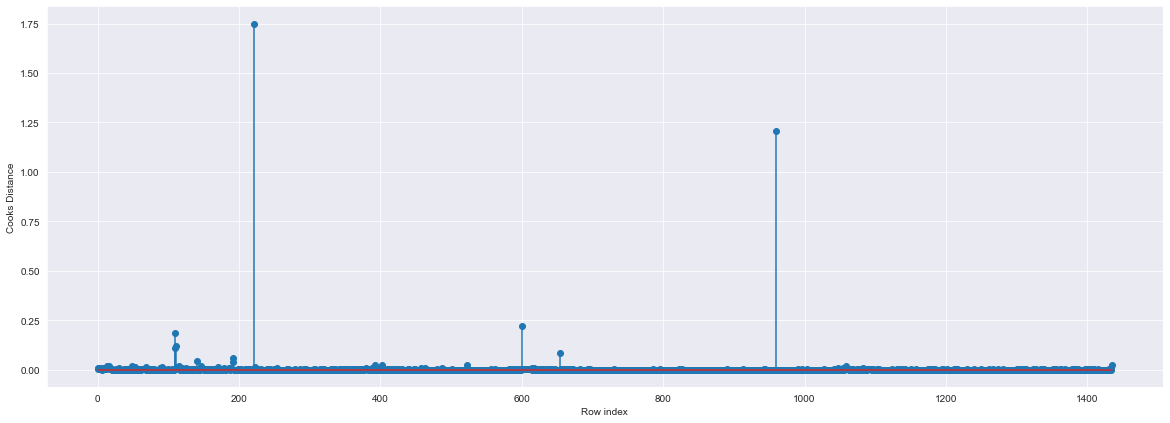

In [79]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [84]:
list(np.where(c_V>1))


[array([221, 960])]

In [85]:
 data4=data3.drop(data3.index[[221,960]], axis=0).reset_index()

In [86]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   index          1434 non-null   int64
 1   Price          1434 non-null   int64
 2   Age_08_04      1434 non-null   int64
 3   KM             1434 non-null   int64
 4   Weight         1434 non-null   int64
 5   Quarterly_Tax  1434 non-null   int64
dtypes: int64(6)
memory usage: 67.3 KB


In [87]:
model_final=smf.ols('Price~Age_08_04+KM+Weight+Quarterly_Tax', data=data4).fit()

In [88]:
model_influence_final= model_final.get_influence()
(c_V, _) = model_influence_final.cooks_distance

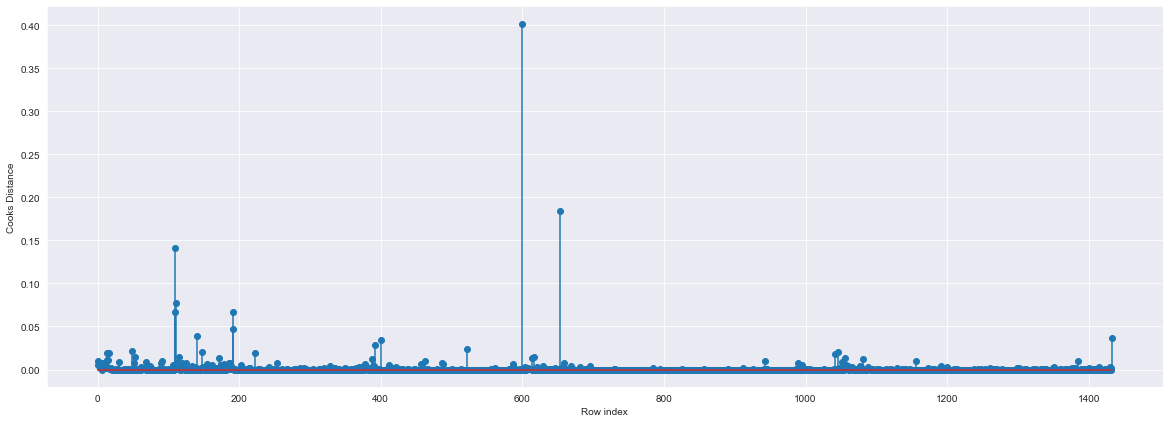

In [89]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [90]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2225.
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        04:49:26   Log-Likelihood:                -12370.
No. Observations:                1434   AIC:                         2.475e+04
Df Residuals:                    1429   BIC:                         2.478e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9388.3441   1197.040     -7.843      0.000   -1.17e+04   -7040.200
Age_08_04      -114.1404      2.689    -42.441      0.000    -119.416    -108.865
KM               -0.0236      0.001    -19.111      0.000      -0.026      -0.021
Weight           26.7472      1.112     24.046      0.000      24.565      28.929
Quarterly_Tax    -6.2801      1.266     -4.962      0.000      -8.763      -3.797
==============================================================================
Omnibus:                      218.270   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.035
Skew:                          -0.448   Prob(JB):                         0.00
Kurtosis:                       8.361   Cond. No.                     2.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

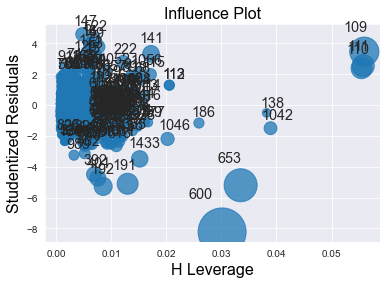

In [91]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_final)
plt.show()

In [92]:
k = data4.shape[1]
n = data4.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.014644351464435146

In [97]:
influencers=data4[data4.index.isin([600,653,1042,138,110,109,111])]

In [100]:
data5=data4.drop(data4.index[[600,653,1042,138,110,109,111]], axis=0).reset_index()

In [101]:
data5

,level_0,index,Price,Age_08_04,KM,Weight,Quarterly_Tax
0,0,0,13500,23,46986,1165,210
1,1,1,13750,23,72937,1165,210
2,2,2,13950,24,41711,1165,210
3,3,3,14950,26,48000,1165,210
4,4,4,13750,30,38500,1170,210
...,...,...,...,...,...,...,...
1422,1429,1431,7500,69,20544,1025,69
1423,1430,1432,10845,72,19000,1015,69
1424,1431,1433,8500,71,17016,1015,69
1425,1432,1434,7250,70,16916,1015,69


In [102]:
k = data5.shape[1]
n = data5.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.016818500350385422

In [103]:
model_final2=smf.ols('Price~Age_08_04+KM+Weight+Quarterly_Tax', data=data5).fit()

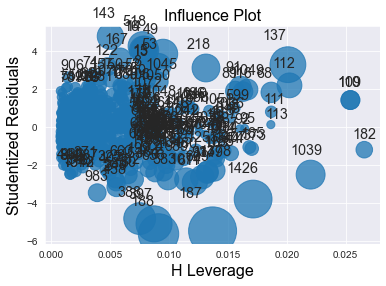

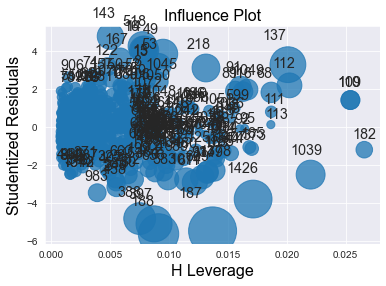

In [104]:
influence_plot(model_final2)

In [107]:
model_final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2219.
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        04:58:56   Log-Likelihood:                -12253.
No. Observations:                1427   AIC:                         2.452e+04
Df Residuals:                    1422   BIC:                         2.454e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.066e+04   1288.391     -8.273      0.000   -1.32e+04   -8131.019
Age_08_04      -113.1083      2.631    -42.995      0.000    -118.269    -107.948
KM               -0.0228      0.001    -18.805      0.000      -0.025      -0.020
Weight           28.0167      1.200     23.349      0.000      25.663      30.370
Quarterly_Tax    -8.5350      1.262     -6.764      0.000     -11.010      -6.060
==============================================================================
Omnibus:                      111.221   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.155
Skew:                          -0.126   Prob(JB):                    6.28e-122
Kurtosis:                       6.054   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/mohamedsemaia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


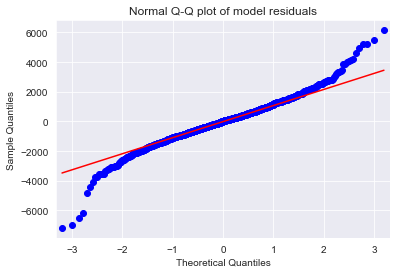

In [108]:
QQ_Plot2=sm.qqplot(model_final2.resid, line='q')
plt.title('Normal Q-Q plot of model residuals')
plt.show()


In [ ]:
model_influence = model_final2.get_influence()
(c_V, _) = model_influence.cooks_distance

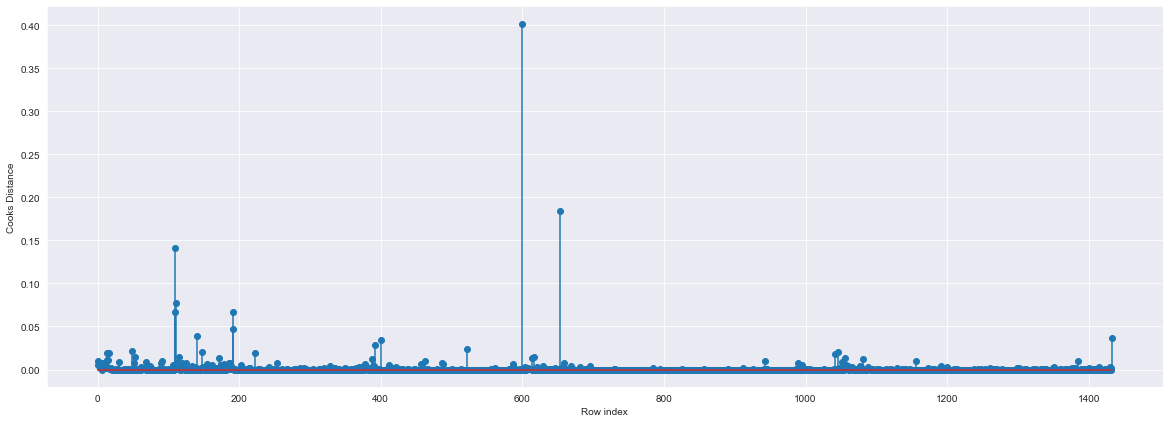

In [109]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');